In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start  = "2010-01-01"
end = "2022-12-31"

df = data.DataReader('AAPL', 'yahoo', start, end)  # taking stocks of diff companies
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434924
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535084
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-16,147.520004,144.179993,145.550003,145.539993,86643800.0,145.539993
2022-05-17,149.770004,146.679993,148.860001,149.240005,78336300.0,149.240005
2022-05-18,147.360001,139.899994,146.850006,140.820007,109742900.0,140.820007
2022-05-19,141.660004,136.600006,139.880005,137.350006,136095600.0,137.350006
2022-05-20,140.699997,132.610001,139.089996,137.589996,137194600.0,137.589996


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434924
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535084
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [5]:
df = df.drop(['Date', 'Adj Close'], axis=1)

In [6]:
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


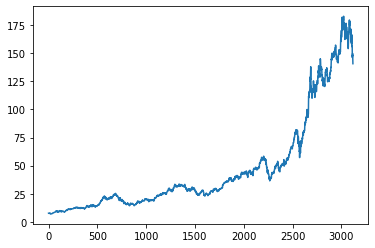

In [7]:
plt.plot(df.High)

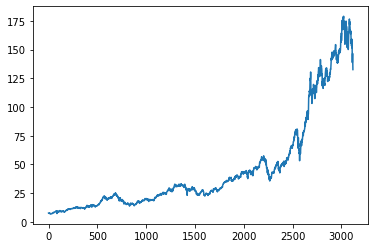

In [8]:
plt.plot(df.Low)

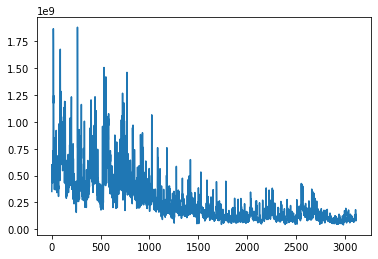

In [9]:
plt.plot(df.Volume)

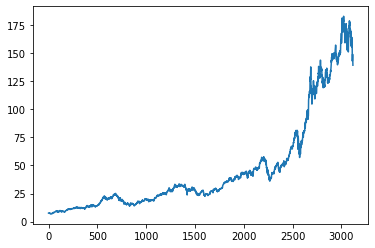

In [10]:
plt.plot(df.Open)

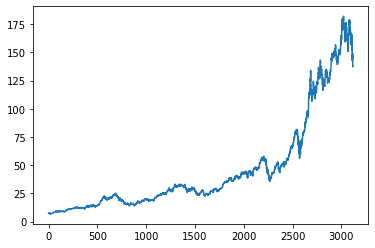

In [11]:
plt.plot(df.Close)

In [12]:
# moving average of 100 values in close column
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3114    166.9504
3115    166.6864
3116    166.3318
3117    165.9020
3118    165.4850
Name: Close, Length: 3119, dtype: float64

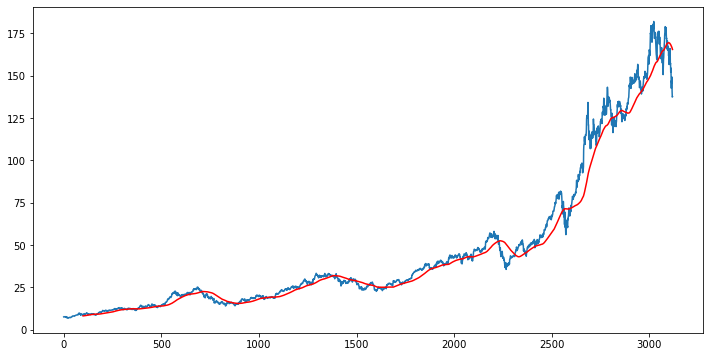

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [14]:
# moving average of 200 values in close column
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3114    159.68530
3115    159.70390
3116    159.67120
3117    159.62320
3118    159.57585
Name: Close, Length: 3119, dtype: float64

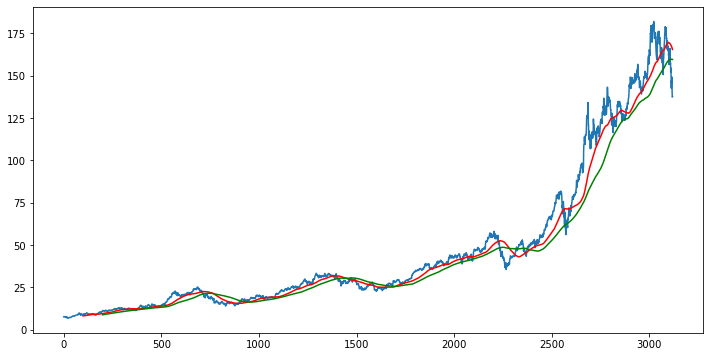

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [16]:
df.shape

(3119, 5)

In [17]:
# import tensorflow as tf
# import keras

In [18]:
# tf.__version__, keras.__version__

In [19]:
# splitting the data into training and testing

data_training = pd.DataFrame(df['Close'][0: int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])


# 70 percent data in my training data and 30 percent is in my testing data

print(data_training.shape)
print(data_testing.shape)

(2183, 1)
(936, 1)


In [20]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [21]:
data_testing.head()

,Close
2183,57.090000
2184,56.717499
2185,55.775002
2186,55.325001
2187,54.582500


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [23]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01332989],
       [0.01567048],
       [0.01593451],
       ...,
       [0.97677252],
       [0.98701259],
       [1.        ]])

In [24]:
data_training_array.shape

(2183, 1)

In [25]:
X_train = []
Y_train = []

for i in range(100, data_training_array.shape[0]): # shape 0 means 2183
    X_train.append(data_training_array[i-100: i])
    Y_train.append(data_training_array[i, 0]) # considering only one column oth maybe
    
X_train, Y_train = np.array(X_train), np.array(Y_train) #converting to numpy array

In [26]:
X_train.shape

(2083, 100, 1)

In [27]:
Y_train.shape

(2083,)

In [28]:
# ML model deploy
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [29]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences= True,
                input_shape = (X_train.shape[1],1)))  #X_train.shape[index1 --> 100], 1th column
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences= True)) 
model.add(Dropout(0.3))

          
model.add(LSTM(units = 80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))

          
model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=50)

Epoch 1/50
66/66 [==============================] - 77s 1s/step - loss: 0.0292
Epoch 2/50
66/66 [==============================] - 70s 1s/step - loss: 0.0061
Epoch 3/50
66/66 [==============================] - 69s 1s/step - loss: 0.0055
Epoch 4/50
66/66 [==============================] - 72s 1s/step - loss: 0.0047
Epoch 5/50
66/66 [==============================] - 71s 1s/step - loss: 0.0040
Epoch 6/50
66/66 [==============================] - 68s 1s/step - loss: 0.0042
Epoch 7/50
66/66 [==============================] - 69s 1s/step - loss: 0.0047
Epoch 8/50
66/66 [==============================] - 69s 1s/step - loss: 0.0038
Epoch 9/50
66/66 [==============================] - 70s 1s/step - loss: 0.0035
Epoch 10/50
66/66 [==============================] - 72s 1s/step - loss: 0.0032
Epoch 11/50
66/66 [==============================] - 69s 1s/step - loss: 0.0031
Epoch 12/50
66/66 [==============================] - 70s 1s/step - loss: 0.0031
Epoch 13/50
66/66 [==============================

In [32]:
model.save('keras_model.h5')

In [66]:
data_testing.head()

,Close
2183,57.090000
2184,56.717499
2185,55.775002
2186,55.325001
2187,54.582500


In [67]:
data_training.tail(100)

,Close
2083,43.535000
2084,43.682499
2085,43.955002
2086,44.560001
2087,44.459999
...,...
2178,54.485001
2179,54.924999
2180,55.744999
2181,56.257500


In [68]:
past_100_days = data_training.tail(100)

In [69]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7604\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [70]:
final_df.head()

,Close
0,43.535000
1,43.682499
2,43.955002
3,44.560001
4,44.459999


In [71]:
input_data = scaler.fit_transform(final_df)

In [72]:
input_data

array([[0.05453614],
       [0.05554322],
       [0.05740378],
       ...,
       [0.71876768],
       [0.6950756 ],
       [0.69671418]])

In [73]:
input_data.shape

(1036, 1)

In [74]:
X_test = []
Y_test = []

for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100: i])
    Y_test.append(input_data[i, 0])

In [75]:
X_test, Y_test  = np.array(X_test), np.array(Y_test)

In [76]:
X_test.shape

(936, 100, 1)

In [77]:
Y_test.shape

(936,)

In [78]:
# making predictions

Y_predicted = model.predict(X_test)

In [79]:
Y_predicted.shape

(936, 1)

In [80]:
Y_test

array([0.14708543, 0.14454211, 0.13810704, 0.13503457, 0.12996501,
       0.13938723, 0.13464199, 0.14375694, 0.13937014, 0.1291969 ,
       0.1298114 , 0.13003328, 0.13286677, 0.12882138, 0.13416403,
       0.13655373, 0.13353247, 0.14126483, 0.14261331, 0.14520781,
       0.1486558 , 0.15341813, 0.14645388, 0.14013825, 0.13925067,
       0.14454211, 0.12660237, 0.12334215, 0.13641717, 0.1283093 ,
       0.13648544, 0.13484681, 0.12602203, 0.13163779, 0.13392506,
       0.13747546, 0.12443458, 0.13247419, 0.12649996, 0.11956987,
       0.1213792 , 0.13086968, 0.13660494, 0.1114449 , 0.10139113,
       0.10511224, 0.115661  , 0.11316891, 0.10630708, 0.08872578,
       0.08541435, 0.07614578, 0.08401469, 0.08763335, 0.07454126,
       0.05938379, 0.05904241, 0.05137833, 0.05535546, 0.05470684,
       0.06614321, 0.06377059, 0.06211488, 0.07276608, 0.0588888 ,
       0.05552616, 0.04489204, 0.04678673, 0.04513101, 0.04593327,
       0.04909106, 0.03975419, 0.03712555, 0.0407613 , 0.03191

In [81]:
Y_predicted

array([[0.15967388],
       [0.16135918],
       [0.16313799],
       [0.16496444],
       [0.1667684 ],
       [0.16846555],
       [0.17001493],
       [0.17138284],
       [0.17258312],
       [0.17362854],
       [0.17449853],
       [0.17517349],
       [0.17564458],
       [0.1759159 ],
       [0.17599156],
       [0.17590955],
       [0.17572504],
       [0.17547886],
       [0.17523491],
       [0.17505518],
       [0.174995  ],
       [0.17510438],
       [0.17543235],
       [0.17595452],
       [0.17661412],
       [0.17734084],
       [0.17808886],
       [0.17876838],
       [0.17928788],
       [0.17961892],
       [0.17972256],
       [0.17962337],
       [0.17936108],
       [0.17894945],
       [0.17841926],
       [0.17781493],
       [0.17719518],
       [0.17656355],
       [0.17593722],
       [0.17531289],
       [0.17466053],
       [0.17395793],
       [0.1732291 ],
       [0.17253503],
       [0.17184752],
       [0.17109492],
       [0.17022172],
       [0.169

In [82]:
scaler.scale_

array([0.00682769])

In [83]:
scale_factor = 1 / 0.00682769

Y_predicted = Y_predicted * scale_factor

Y_test = Y_test * scale_factor

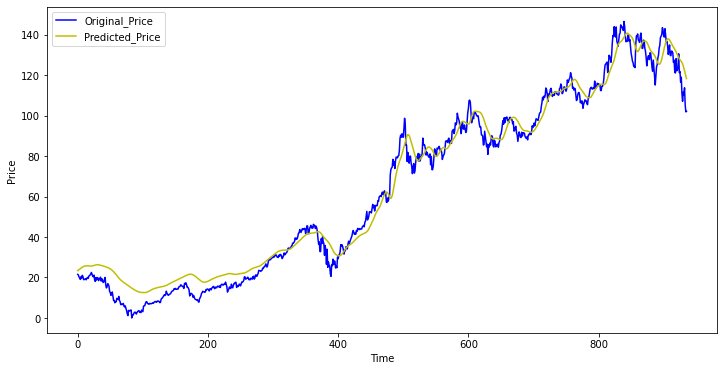

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(Y_test, 'b', label= "Original_Price")
plt.plot(Y_predicted, 'y', label= "Predicted_Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()